<a href="https://colab.research.google.com/github/riddhikaa/pyml_assignment1/blob/main/Fraud_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
!pip install catboost
import catboost as cb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import traceback
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [2]:
# from google.colab import files
# files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rohit265/fraud-detection-dynamics-financial-transaction
!unzip fraud-detection-dynamics-financial-transaction.zip

df = pd.read_csv('Transactions Data.csv')

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rohit265/fraud-detection-dynamics-financial-transaction
License(s): Attribution 4.0 International (CC BY 4.0)
 96% 171M/178M [00:02<00:00, 82.6MB/s]
100% 178M/178M [00:02<00:00, 68.0MB/s]
Archive:  fraud-detection-dynamics-financial-transaction.zip
  inflating: Transactions Data.csv   


In [3]:
df.head()
df.shape

(6362620, 11)

In [4]:
print(f"Total number of columns in the DataFrame:", df.shape[1])
print(f"Total number of rows in the DataFrame:", df.shape[0])
print("COLUMNS:- /n", df.columns)

fraud_cases = df[df['isFraud'] == 1]
non_fraud_cases = df[df['isFraud'] == 0]
number_of_fraud_cases = fraud_cases.shape[0]
number_of_non_fraud_cases = non_fraud_cases.shape[0]

print(f"Number of fraud cases: {number_of_fraud_cases}")
print(f"Number of non-fraud cases: {number_of_non_fraud_cases}")

Total number of columns in the DataFrame: 11
Total number of rows in the DataFrame: 6362620
COLUMNS:- /n Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Number of fraud cases: 8213
Number of non-fraud cases: 6354407


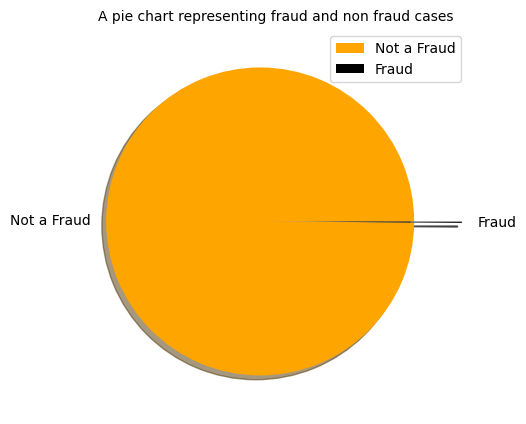

In [5]:
labels = ['Not a Fraud', 'Fraud']
colors = ['orange', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing fraud and non fraud cases',fontsize = 10)
plt.legend()
plt.show()


In [6]:
try:
  fraud_cases = df[df['isFraud'] == 1]
  non_fraud_cases = df[df['isFraud'] == 0]
  if len(fraud_cases) > 1000:
    fraud_cases_sample = fraud_cases.sample(n=1000, random_state=42)
  else:
    fraud_cases_sample = fraud_cases

  if len(non_fraud_cases) > 20000:
    non_fraud_cases_sample = non_fraud_cases.sample(n=20000, random_state=42)
  else:
    non_fraud_cases_sample = non_fraud_cases

  df_sampled = pd.concat([fraud_cases_sample, non_fraud_cases_sample])

  df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

  df_sampled.dropna(inplace=True)

  categorical_columns = df_sampled.select_dtypes(include=['object']).columns

  for col in categorical_columns:
    try:
      df_sampled = pd.concat([df_sampled, pd.get_dummies(df_sampled[col], prefix=col, drop_first=True)], axis=1)
      df_sampled.drop(col, axis=1, inplace=True)
    except Exception as e:
        print(f"Error encoding column {col}: {e}")

  print("Sampled dataset created successfully with 1000 fraud cases and 20000 non-fraud cases.")

except Exception as e:
  print(f"An error occurred: {e}")

Sampled dataset created successfully with 1000 fraud cases and 20000 non-fraud cases.


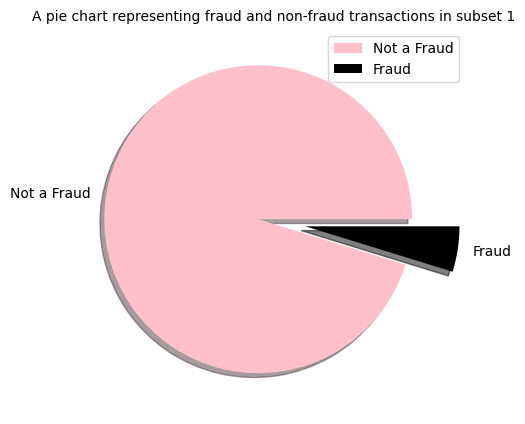

In [7]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [20000 , 1000]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing fraud and non-fraud transactions in subset 1',fontsize = 10)
plt.legend()
plt.show()

In [8]:
df_sampled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,...,nameDest_M997185343,nameDest_M9973054,nameDest_M997446731,nameDest_M997479806,nameDest_M997503974,nameDest_M998274857,nameDest_M99878530,nameDest_M998829432,nameDest_M999200603,nameDest_M999919881
0,347,17293.70,0.00,0.00,0.00,0.00,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,304,299217.69,16943785.73,17243003.43,3683414.99,3384197.30,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,428,87300.31,52606.00,0.00,1733791.90,1821092.21,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,163,7118.77,136627.48,129508.71,0.00,0.00,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,252,272649.82,50586.00,323235.82,0.00,0.00,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,234,119987.87,90106.00,0.00,0.00,119987.87,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
20996,164,55026.04,0.00,0.00,228802.12,283828.16,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
20997,45,6944.17,79477.00,72532.83,1813745.17,1820689.34,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
20998,274,379057.93,379057.93,0.00,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_sampled = df_sampled.iloc[:, :11]
df_sampled


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,347,17293.70,0.00,0.00,0.00,0.00,0,0,False,False,True
1,304,299217.69,16943785.73,17243003.43,3683414.99,3384197.30,0,0,False,False,False
2,428,87300.31,52606.00,0.00,1733791.90,1821092.21,0,0,True,False,False
3,163,7118.77,136627.48,129508.71,0.00,0.00,0,0,False,False,True
4,252,272649.82,50586.00,323235.82,0.00,0.00,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20995,234,119987.87,90106.00,0.00,0.00,119987.87,0,0,True,False,False
20996,164,55026.04,0.00,0.00,228802.12,283828.16,0,0,True,False,False
20997,45,6944.17,79477.00,72532.83,1813745.17,1820689.34,0,0,False,True,False
20998,274,379057.93,379057.93,0.00,0.00,0.00,1,0,False,False,False


In [10]:
try:
    target_column = 'isFraud'

    if target_column in df_sampled.columns:

        X = df_sampled.drop(target_column, axis=1)
        y = df_sampled[target_column]
        X = X.select_dtypes(include=[np.number])

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        print("Features scaled successfully")
    else:
        print(f"'{target_column}' column not found in the dataset")

except Exception as e:
    print(f"An error occurred: {e}")
    traceback.print_exc()

Features scaled successfully


In [11]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,347,17293.70,0.00,0.00,0.00,0.00,0
1,304,299217.69,16943785.73,17243003.43,3683414.99,3384197.30,0
2,428,87300.31,52606.00,0.00,1733791.90,1821092.21,0
3,163,7118.77,136627.48,129508.71,0.00,0.00,0
4,252,272649.82,50586.00,323235.82,0.00,0.00,0
...,...,...,...,...,...,...,...
20995,234,119987.87,90106.00,0.00,0.00,119987.87,0
20996,164,55026.04,0.00,0.00,228802.12,283828.16,0
20997,45,6944.17,79477.00,72532.83,1813745.17,1820689.34,0
20998,274,379057.93,379057.93,0.00,0.00,0.00,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
import time
from sklearn.metrics import f1_score

result=[]

In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time


# 1. Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Random Forest MODEL",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5978   12]
 [  37  273]]
Confusion Matrix (training):
 [[14010     0]
 [    0   690]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5990
           1       0.96      0.88      0.92       310

    accuracy                           0.99      6300
   macro avg       0.98      0.94      0.96      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 1.0

Testing Accuracy Score: 0.9922222222222222


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 2. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Naive Bayes MODEL",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5986    4]
 [ 278   32]]
Confusion Matrix (training):
 [[14000    10]
 [  629    61]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14010
           1       0.86      0.09      0.16       690

    accuracy                           0.96     14700
   macro avg       0.91      0.54      0.57     14700
weighted avg       0.95      0.96      0.94     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5990
           1       0.89      0.10      0.18       310

    accuracy                           0.96      6300
   macro avg       0.92      0.55      0.58      6300
weighted avg       0.95      0.96      0.94      6300


Accuracy Score (training): 0.956530612244898

Testing Accuracy Score: 0.9552380952380952


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time
# 3. K-Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "KNN MODEL",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5969   21]
 [ 118  192]]
Confusion Matrix (training):
 [[13988    22]
 [  223   467]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14010
           1       0.96      0.68      0.79       690

    accuracy                           0.98     14700
   macro avg       0.97      0.84      0.89     14700
weighted avg       0.98      0.98      0.98     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5990
           1       0.90      0.62      0.73       310

    accuracy                           0.98      6300
   macro avg       0.94      0.81      0.86      6300
weighted avg       0.98      0.98      0.98      6300


Accuracy Score (training): 0.9833333333333333

Testing Accuracy Score: 0.9779365079365079


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time
# 4. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Logistic Regression MODEL",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5990    0]
 [ 175  135]]
Confusion Matrix (training):
 [[14010     0]
 [  375   315]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     14010
           1       1.00      0.46      0.63       690

    accuracy                           0.97     14700
   macro avg       0.99      0.73      0.81     14700
weighted avg       0.98      0.97      0.97     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5990
           1       1.00      0.44      0.61       310

    accuracy                           0.97      6300
   macro avg       0.99      0.72      0.80      6300
weighted avg       0.97      0.97      0.97      6300


Accuracy Score (training): 0.9744897959183674

Testing Accuracy Score: 0.9722222222222222


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time
# 5. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "svm MODEL",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5990    0]
 [ 153  157]]
Confusion Matrix (training):
 [[14007     3]
 [  331   359]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14010
           1       0.99      0.52      0.68       690

    accuracy                           0.98     14700
   macro avg       0.98      0.76      0.84     14700
weighted avg       0.98      0.98      0.97     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5990
           1       1.00      0.51      0.67       310

    accuracy                           0.98      6300
   macro avg       0.99      0.75      0.83      6300
weighted avg       0.98      0.98      0.97      6300


Accuracy Score (training): 0.9772789115646259

Testing Accuracy Score: 0.9757142857142858


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time
# 6. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Gradient Boosting Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })



Confusion Matrix (testing):
 [[5974   16]
 [  36  274]]
Confusion Matrix (training):
 [[14000    10]
 [   61   629]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       0.98      0.91      0.95       690

    accuracy                           1.00     14700
   macro avg       0.99      0.96      0.97     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5990
           1       0.94      0.88      0.91       310

    accuracy                           0.99      6300
   macro avg       0.97      0.94      0.95      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9951700680272109

Testing Accuracy Score: 0.9917460317460317


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 7. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          eval_metric='aucpr',  # ---> more sensitive to class imbalance.
                          scale_pos_weight=20)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "XGBoost Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5951   39]
 [  11  299]]
Confusion Matrix (training):
 [[14008     2]
 [    0   690]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5990
           1       0.88      0.96      0.92       310

    accuracy                           0.99      6300
   macro avg       0.94      0.98      0.96      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9998639455782313

Testing Accuracy Score: 0.9920634920634921


In [ ]:

result

[{'Algorithm': 'Random Forest MODEL',
  'Computational Time (s)': 7.2479248046875e-05,
  'Training accuracy': 1.0,
  'Testing accuracy': 0.9922222222222222,
  'F1 Score (testing)': 0.9920669220068978,
  'F1 Score (training)': 1.0},
 {'Algorithm': 'Naive Bayes MODEL',
  'Computational Time (s)': 5.221366882324219e-05,
  'Training accuracy': 0.956530612244898,
  'Testing accuracy': 0.9552380952380952,
  'F1 Score (testing)': 0.9380148899850853,
  'F1 Score (training)': 0.9393213091211988},
 {'Algorithm': 'KNN MODEL',
  'Computational Time (s)': 0.00014781951904296875,
  'Training accuracy': 0.9833333333333333,
  'Testing accuracy': 0.9779365079365079,
  'F1 Score (testing)': 0.97597907181888,
  'F1 Score (training)': 0.981971990792773},
 {'Algorithm': 'Logistic Regression MODEL',
  'Computational Time (s)': 6.818771362304688e-05,
  'Training accuracy': 0.9744897959183674,
  'Testing accuracy': 0.9722222222222222,
  'F1 Score (testing)': 0.9669602630607255,
  'F1 Score (training)': 0.9698

In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 8. AdaBoost Classifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "AdaBoost Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5973   17]
 [  60  250]]
Confusion Matrix (training):
 [[13971    39]
 [  147   543]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14010
           1       0.93      0.79      0.85       690

    accuracy                           0.99     14700
   macro avg       0.96      0.89      0.92     14700
weighted avg       0.99      0.99      0.99     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5990
           1       0.94      0.81      0.87       310

    accuracy                           0.99      6300
   macro avg       0.96      0.90      0.93      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9873469387755102

Testing Accuracy Score: 0.9877777777777778


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 9. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Decision Tree Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5966   24]
 [  28  282]]
Confusion Matrix (training):
 [[14010     0]
 [    0   690]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5990
           1       0.92      0.91      0.92       310

    accuracy                           0.99      6300
   macro avg       0.96      0.95      0.96      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 1.0

Testing Accuracy Score: 0.9917460317460317


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 10. Extra Trees Classifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

y_train_pred = et_model.predict(X_train)
y_test_pred = et_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Extra Trees Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5985    5]
 [  49  261]]
Confusion Matrix (training):
 [[14010     0]
 [    0   690]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5990
           1       0.98      0.84      0.91       310

    accuracy                           0.99      6300
   macro avg       0.99      0.92      0.95      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 1.0

Testing Accuracy Score: 0.9914285714285714


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 11. LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "LightGBM Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })

[LightGBM] [Info] Number of positive: 690, number of negative: 14010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 14700, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046939 -> initscore=-3.010835
[LightGBM] [Info] Start training from score -3.010835
Confusion Matrix (testing):
 [[5976   14]
 [  16  294]]
Confusion Matrix (training):
 [[14010     0]
 [    0   690]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testi

In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 12. CatBoost Classifier
cb_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)

y_train_pred = cb_model.predict(X_train)
y_test_pred = cb_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "CatBoost Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5971   19]
 [  21  289]]
Confusion Matrix (training):
 [[14008     2]
 [   12   678]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      0.98      0.99       690

    accuracy                           1.00     14700
   macro avg       1.00      0.99      0.99     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5990
           1       0.94      0.93      0.94       310

    accuracy                           0.99      6300
   macro avg       0.97      0.96      0.97      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9990476190476191

Testing Accuracy Score: 0.9936507936507937


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 13. Bagging Classifier
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)

y_train_pred = bag_model.predict(X_train)
y_test_pred = bag_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Bagging Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5975   15]
 [  27  283]]
Confusion Matrix (training):
 [[14008     2]
 [    6   684]]

Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      0.99      0.99       690

    accuracy                           1.00     14700
   macro avg       1.00      1.00      1.00     14700
weighted avg       1.00      1.00      1.00     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5990
           1       0.95      0.91      0.93       310

    accuracy                           0.99      6300
   macro avg       0.97      0.96      0.96      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9994557823129252

Testing Accuracy Score: 0.9933333333333333


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 15. Ridge Classifier
ridge_model = RidgeClassifier(random_state=42)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Ridge Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5990    0]
 [ 249   61]]
Confusion Matrix (training):
 [[14010     0]
 [  567   123]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14010
           1       1.00      0.18      0.30       690

    accuracy                           0.96     14700
   macro avg       0.98      0.59      0.64     14700
weighted avg       0.96      0.96      0.95     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5990
           1       1.00      0.20      0.33       310

    accuracy                           0.96      6300
   macro avg       0.98      0.60      0.65      6300
weighted avg       0.96      0.96      0.95      6300


Accuracy Score (training): 0.9614285714285714

Testing Accuracy Score: 0.9604761904761905


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 16. Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_train_pred = lda_model.predict(X_train)
y_test_pred = lda_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Linear Discriminant Analysis (LDA)",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5990    0]
 [ 211   99]]
Confusion Matrix (training):
 [[14010     0]
 [  470   220]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     14010
           1       1.00      0.32      0.48       690

    accuracy                           0.97     14700
   macro avg       0.98      0.66      0.73     14700
weighted avg       0.97      0.97      0.96     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5990
           1       1.00      0.32      0.48       310

    accuracy                           0.97      6300
   macro avg       0.98      0.66      0.73      6300
weighted avg       0.97      0.97      0.96      6300


Accuracy Score (training): 0.9680272108843537

Testing Accuracy Score: 0.9665079365079365


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 17. Quadratic Discriminant Analysis (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

y_train_pred = qda_model.predict(X_train)
y_test_pred = qda_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Quadratic Discriminant Analysis (QDA)",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5990    0]
 [ 187  123]]
Confusion Matrix (training):
 [[14010     0]
 [  399   291]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     14010
           1       1.00      0.42      0.59       690

    accuracy                           0.97     14700
   macro avg       0.99      0.71      0.79     14700
weighted avg       0.97      0.97      0.97     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5990
           1       1.00      0.40      0.57       310

    accuracy                           0.97      6300
   macro avg       0.98      0.70      0.78      6300
weighted avg       0.97      0.97      0.96      6300


Accuracy Score (training): 0.9728571428571429

Testing Accuracy Score: 0.9703174603174604


In [ ]:
start_Time=time.time()
end_Time=time.time()
computational_time = end_Time - start_Time

# 18. Multilayer Perceptron (MLP) Classifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)


print("Confusion Matrix (testing):\n",confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix (training):\n",confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (training):\n",classification_report(y_train, y_train_pred))
print("\nClassification Report (testing):\n",classification_report(y_test, y_test_pred))
print("\nAccuracy Score (training):",accuracy_score(y_train, y_train_pred))
print("\nTesting Accuracy Score:",accuracy_score(y_test, y_test_pred))

result.append({ "Algorithm": "Multilayer Perceptron (MLP) Classifier",
               "Computational Time (s)": computational_time,
               "Training accuracy": accuracy_score(y_train, y_train_pred),
               "Testing accuracy": accuracy_score(y_test, y_test_pred),
              "F1 Score (testing)": f1_score(y_test, y_test_pred, average='weighted'),
              "F1 Score (training)": f1_score(y_train, y_train_pred, average='weighted')
               })


Confusion Matrix (testing):
 [[5974   16]
 [  53  257]]
Confusion Matrix (training):
 [[13979    31]
 [  148   542]]

Classification Report (training):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14010
           1       0.95      0.79      0.86       690

    accuracy                           0.99     14700
   macro avg       0.97      0.89      0.93     14700
weighted avg       0.99      0.99      0.99     14700


Classification Report (testing):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5990
           1       0.94      0.83      0.88       310

    accuracy                           0.99      6300
   macro avg       0.97      0.91      0.94      6300
weighted avg       0.99      0.99      0.99      6300


Accuracy Score (training): 0.9878231292517007

Testing Accuracy Score: 0.9890476190476191


In [ ]:
result
result=pd.DataFrame(result)
result

,Algorithm,Computational Time (s),Training accuracy,Testing accuracy,F1 Score (testing),F1 Score (training)
0,Random Forest MODEL,0.000072,1.000000,0.992222,0.992067,1.000000
1,Naive Bayes MODEL,0.000052,0.956531,0.955238,0.938015,0.939321
2,KNN MODEL,0.000148,0.983333,0.977937,0.975979,0.981972
3,Logistic Regression MODEL,0.000068,0.974490,0.972222,0.966960,0.969899
4,svm MODEL,0.000052,0.977279,0.975714,0.971889,0.973868
5,Gradient Boosting Classifier,0.000063,0.995170,0.991746,0.991615,0.995082
6,XGBoost Classifier,0.000057,0.999864,0.992063,0.992226,0.999864
7,AdaBoost Classifier,0.000054,0.987347,0.987778,0.987344,0.986834
8,Decision Tree Classifier,0.000064,1.000000,0.991746,0.991721,1.000000
9,Extra Trees Classifier,0.000045,1.000000,0.991429,0.991117,1.000000


In [ ]:
'''
--> extra validation --> synthetic data
--> models:
    1. Naive Bayes
    2. Logistic Regression
    3. AdaBoost
    4. LightGBM
    5. CatBoost
    6. Ridge Classifier
    7. Linear Discriminant Analysis
    8. Quadratic Discriminant Analysis
'''

'\n--> extra validation --> synthetic data\n--> models:\n    1. Naive Bayes\n    2. Logistic Regression\n    3. AdaBoost\n    4. LightGBM\n    5. CatBoost\n    6. Ridge Classifier\n    7. Linear Discriminant Analysis\n    8. Quadratic Discriminant Analysis\n'

In [13]:
std_dev = 0.05
synthetic_data = df_sampled.copy()
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numeric_columns:
    noise = np.random.normal(0, std_dev, size=df_sampled[col].shape)
    synthetic_data[col] += noise

#ensuring that non-negative features stay non-negative
synthetic_data[numeric_columns] = synthetic_data[numeric_columns].clip(lower=0)

#the'isFraud' and 'isFlaggedFraud' columns should remain binary (0 or 1)
synthetic_data['isFraud'] = df_sampled['isFraud']
synthetic_data['isFlaggedFraud'] = df_sampled['isFlaggedFraud']

#'type_CASH_OUT', 'type_DEBIT', and 'type_PAYMENT' remain unchanged
synthetic_data[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT']] = df_sampled[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT']]

In [14]:
synthetic_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,347.037018,17293.723772,7.613606e-02,5.739576e-03,2.847277e-02,0.000000e+00,0,0,False,False,True
1,303.988839,299217.664882,1.694379e+07,1.724300e+07,3.683415e+06,3.384197e+06,0,0,False,False,False
2,427.959133,87300.239414,5.260593e+04,3.855233e-02,1.733792e+06,1.821092e+06,0,0,True,False,False
3,162.888994,7118.782195,1.366275e+05,1.295087e+05,0.000000e+00,5.034278e-03,0,0,False,False,True
4,252.056262,272649.737639,5.058598e+04,3.232359e+05,3.077669e-02,0.000000e+00,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20995,233.993209,119987.836979,9.010605e+04,0.000000e+00,0.000000e+00,1.199878e+05,0,0,True,False,False
20996,163.980544,55026.065641,9.309651e-03,1.052560e-01,2.288021e+05,2.838282e+05,0,0,True,False,False
20997,45.078257,6944.144385,7.947695e+04,7.253289e+04,1.813745e+06,1.820689e+06,0,0,False,True,False
20998,273.964904,379057.917396,3.790579e+05,0.000000e+00,4.468992e-03,1.149650e-01,1,0,False,False,False


In [16]:
df_sampled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,347,17293.70,0.00,0.00,0.00,0.00,0,0,False,False,True
1,304,299217.69,16943785.73,17243003.43,3683414.99,3384197.30,0,0,False,False,False
2,428,87300.31,52606.00,0.00,1733791.90,1821092.21,0,0,True,False,False
3,163,7118.77,136627.48,129508.71,0.00,0.00,0,0,False,False,True
4,252,272649.82,50586.00,323235.82,0.00,0.00,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20995,234,119987.87,90106.00,0.00,0.00,119987.87,0,0,True,False,False
20996,164,55026.04,0.00,0.00,228802.12,283828.16,0,0,True,False,False
20997,45,6944.17,79477.00,72532.83,1813745.17,1820689.34,0,0,False,True,False
20998,274,379057.93,379057.93,0.00,0.00,0.00,1,0,False,False,False


In [17]:
fraud_cases = synthetic_data[synthetic_data['isFraud'] == 1]
non_fraud_cases = synthetic_data[synthetic_data['isFraud'] == 0]
number_of_fraud_cases = fraud_cases.shape[0]
number_of_non_fraud_cases = non_fraud_cases.shape[0]

print(f"Number of fraud cases: {number_of_fraud_cases}")
print(f"Number of non-fraud cases: {number_of_non_fraud_cases}")

Number of fraud cases: 1000
Number of non-fraud cases: 20000


In [18]:
target = 'isFraud'

A = synthetic_data.drop(target, axis=1)
B = synthetic_data[target]


A = A.select_dtypes(include=[np.number])

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)


In [19]:
A # features
B # target

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
20995,0
20996,0
20997,0
20998,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(A_scaled, B, test_size=0.3, random_state=42)

In [21]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0),
    "Ridge Classifier": RidgeClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

In [22]:
from sklearn.model_selection import cross_val_score
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

Naive Bayes: 0.9563 ± 0.0012
Logistic Regression: 0.9735 ± 0.0028
AdaBoost: 0.9854 ± 0.0030
[LightGBM] [Info] Number of positive: 552, number of negative: 11208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 11760, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046939 -> initscore=-3.010835
[LightGBM] [Info] Start training from score -3.010835
[LightGBM] [Info] Number of positive: 552, number of negative: 11208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 11760, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046939 -> 

In [50]:
from sklearn.metrics import f1_score
final_results = {}
f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')


    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    final_results[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
    f1_scores[name] = {'Train F1': train_f1, 'Test F1': test_f1}

    print(f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"{name} - Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}\n")

# Summary of cross-validation accuracy results
print("\nCross-Validation Results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

# Summary of accuracy and F1 score results
print("\nFinal Results (Accuracy):")
for name, metrics in final_results.items():
    print(f"{name}: Train Accuracy: {metrics['Train Accuracy']:.4f}, Test Accuracy: {metrics['Test Accuracy']:.4f}")

print("\nFinal Results (F1 Score):")
for name, metrics in f1_scores.items():
    print(f"{name}: Train F1 Score: {metrics['Train F1']:.4f}, Test F1 Score: {metrics['Test F1']:.4f}")

Naive Bayes - Train Accuracy: 0.9350, Test Accuracy: 0.9336
Naive Bayes - Train F1 Score: 0.9139, Test F1 Score: 0.9120

Logistic Regression - Train Accuracy: 0.9643, Test Accuracy: 0.9656
Logistic Regression - Train F1 Score: 0.9592, Test F1 Score: 0.9608

AdaBoost - Train Accuracy: 0.9828, Test Accuracy: 0.9809
AdaBoost - Train F1 Score: 0.9822, Test F1 Score: 0.9803

[LightGBM] [Info] Number of positive: 1402, number of negative: 17498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074180 -> initscore=-2.524187
[LightGBM] [Info] Start training from score -2.524187
LightGBM - Train Accuracy: 0.9999, Test Accuracy: 0.9946
LightGBM - Train F1 Score: 0.9999, Test F1 Score: 0.9946

CatBoost - Train Acc

In [51]:

final_results=pd.DataFrame(final_results)
final_results=final_results.T

In [52]:
final_results

,Train Accuracy,Test Accuracy
Naive Bayes,0.935026,0.933580
Logistic Regression,0.964339,0.965556
AdaBoost,0.982751,0.980864
LightGBM,0.999947,0.994568
CatBoost,0.998148,0.992222
Ridge Classifier,0.939683,0.938889
Linear Discriminant Analysis,0.947619,0.947407
Quadratic Discriminant Analysis,0.954868,0.955432


In [53]:
f1_scores=pd.DataFrame(f1_scores)
f1_scores=f1_scores.T

In [54]:
f1_scores

,Train F1,Test F1
Naive Bayes,0.913923,0.912043
Logistic Regression,0.959159,0.960769
AdaBoost,0.982210,0.980339
LightGBM,0.999947,0.994572
CatBoost,0.998148,0.992183
Ridge Classifier,0.919972,0.918288
Linear Discriminant Analysis,0.934046,0.933585
Quadratic Discriminant Analysis,0.945570,0.946322


[LightGBM] [Info] Number of positive: 690, number of negative: 14010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 14700, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046939 -> initscore=-3.010835
[LightGBM] [Info] Start training from score -3.010835


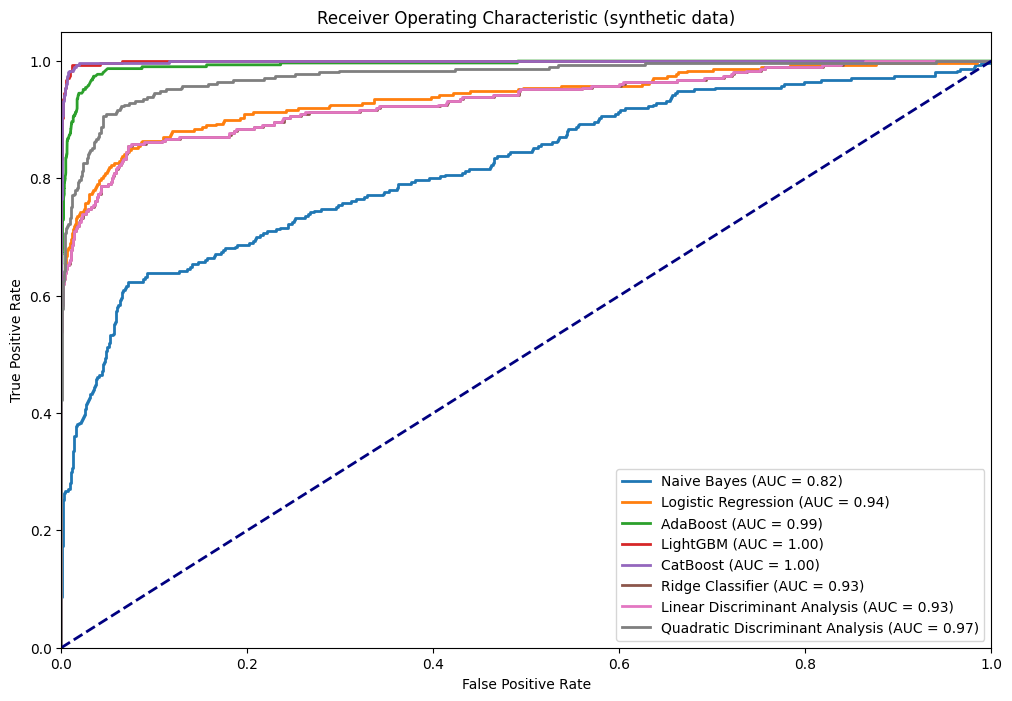

In [33]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for model_name, model in models.items():

    model.fit(X_train, y_train)

    if len(np.unique(y_train)) > 2:

        y_score = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    else:

        y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)

        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (synthetic data)')
plt.legend(loc="lower right")
plt.show()


In [55]:
# df_sampled2
# new subset for extravalidation on unseen data
# df_sampled2 will have 1000 more fraud cases and 5000 more non fraud cases

try:
  fraud_cases = df[df['isFraud'] == 1]
  non_fraud_cases = df[df['isFraud'] == 0]
  if len(fraud_cases) > 3000:
    fraud_cases_sample = fraud_cases.sample(n=3000, random_state=42)
  else:
    fraud_cases_sample = fraud_cases

  if len(non_fraud_cases) > 29000:
    non_fraud_cases_sample = non_fraud_cases.sample(n=29000, random_state=42)
  else:
    non_fraud_cases_sample = non_fraud_cases

  df_sampled2 = pd.concat([fraud_cases_sample, non_fraud_cases_sample])

  df_sampled2 = df_sampled2.sample(frac=1, random_state=42).reset_index(drop=True)

  df_sampled2.dropna(inplace=True)

  categorical_columns = df_sampled2.select_dtypes(include=['object']).columns

  for col in categorical_columns:
    try:
      df_sampled2 = pd.concat([df_sampled2, pd.get_dummies(df_sampled2[col], prefix=col, drop_first=True)], axis=1)
      df_sampled2.drop(col, axis=1, inplace=True)
    except Exception as e:
        print(f"Error encoding column {col}: {e}")

  print("Sampled dataset created successfully with 3000 fraud cases and 29000 non-fraud cases.")

except Exception as e:
  print(f"An error occurred: {e}")

Sampled dataset created successfully with 2000 fraud cases and 25000 non-fraud cases.


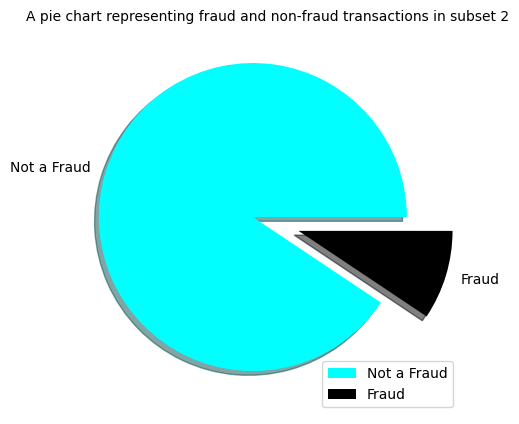

In [56]:
labels = ['Not a Fraud', 'Fraud']
colors = ['cyan', 'black']
size = [29000 , 3000]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing fraud and non-fraud transactions in subset 2',fontsize = 10)
plt.legend()
plt.show()

In [57]:
df_sampled2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,...,nameDest_M997446731,nameDest_M997479806,nameDest_M997503974,nameDest_M997933477,nameDest_M998274857,nameDest_M998682225,nameDest_M99878530,nameDest_M998829432,nameDest_M999200603,nameDest_M999919881
0,164,378045.06,0.00,0.00,409665.66,787710.72,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,261,10532.65,30765.00,20232.35,0.00,0.00,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,135,78613.56,51115.00,0.00,1809249.04,1887862.60,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,139,76630.48,1632065.17,1708695.65,10741759.91,10665129.43,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,282,17015.05,6299142.45,6316157.50,372283.60,355268.55,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,179,62930.32,10761.00,73691.32,3063769.45,3000839.13,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
31996,382,597115.18,0.00,0.00,3753349.70,4350464.89,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
31997,274,379057.93,379057.93,0.00,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
31998,142,241657.52,0.00,0.00,504371.16,746028.68,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
target2 = 'isFraud'

A = df_sampled2.drop(target2, axis=1)
B = df_sampled2[target2]


A = A.select_dtypes(include=[np.number])

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)


In [59]:
A
B
X_train, X_test, y_train, y_test = train_test_split(A_scaled, B, test_size=0.3, random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score
results_2 = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results_2[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Naive Bayes: 0.9170 ± 0.0022
Logistic Regression: 0.9576 ± 0.0025
AdaBoost: 0.9795 ± 0.0012
[LightGBM] [Info] Number of positive: 1647, number of negative: 16273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 17920, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091908 -> initscore=-2.290552
[LightGBM] [Info] Start training from score -2.290552
[LightGBM] [Info] Number of positive: 1647, number of negative: 16273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 17920, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091908 -

In [61]:
final_results_2 = {}
f1_scores_2 = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')


    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    final_results_2[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
    f1_scores_2[name] = {'Train F1': train_f1, 'Test F1': test_f1}

    print(f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"{name} - Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}\n")

# Summary of cross-validation accuracy results
print("\nCross-Validation Results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

# Summary of accuracy and F1 score results
print("\nFinal Results (Accuracy):")
for name, metrics in final_results_2.items():
    print(f"{name}: Train Accuracy: {metrics['Train Accuracy']:.4f}, Test Accuracy: {metrics['Test Accuracy']:.4f}")

print("\nFinal Results (F1 Score):")
for name, metrics in f1_scores_2.items():
    print(f"{name}: Train F1 Score: {metrics['Train F1']:.4f}, Test F1 Score: {metrics['Test F1']:.4f}")

Naive Bayes - Train Accuracy: 0.9169, Test Accuracy: 0.9111
Naive Bayes - Train F1 Score: 0.8874, Test F1 Score: 0.8782

Logistic Regression - Train Accuracy: 0.9590, Test Accuracy: 0.9561
Logistic Regression - Train F1 Score: 0.9537, Test F1 Score: 0.9505

AdaBoost - Train Accuracy: 0.9813, Test Accuracy: 0.9781
AdaBoost - Train F1 Score: 0.9809, Test F1 Score: 0.9776

[LightGBM] [Info] Number of positive: 2059, number of negative: 20341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091920 -> initscore=-2.290418
[LightGBM] [Info] Start training from score -2.290418
LightGBM - Train Accuracy: 1.0000, Test Accuracy: 0.9927
LightGBM - Train F1 Score: 1.0000, Test F1 Score: 0.9927

CatBoost - Train Acc

In [62]:
final_results_2=pd.DataFrame(final_results_2)
final_results_2=final_results_2.T


In [63]:
final_results_2

,Train Accuracy,Test Accuracy
Naive Bayes,0.916920,0.911146
Logistic Regression,0.959018,0.956146
AdaBoost,0.981295,0.978125
LightGBM,0.999955,0.992708
CatBoost,0.998839,0.992188
Ridge Classifier,0.925804,0.918021
Linear Discriminant Analysis,0.934107,0.927708
Quadratic Discriminant Analysis,0.944955,0.940417


In [64]:
f1_scores_2=pd.DataFrame(f1_scores_2)
f1_scores_2=f1_scores_2.T
f1_scores_2

,Train F1,Test F1
Naive Bayes,0.887367,0.878199
Logistic Regression,0.953730,0.950492
AdaBoost,0.980942,0.977574
LightGBM,0.999955,0.992715
CatBoost,0.998840,0.992182
Ridge Classifier,0.902155,0.890343
Linear Discriminant Analysis,0.916855,0.907986
Quadratic Discriminant Analysis,0.934054,0.928361


[LightGBM] [Info] Number of positive: 2059, number of negative: 20341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091920 -> initscore=-2.290418
[LightGBM] [Info] Start training from score -2.290418


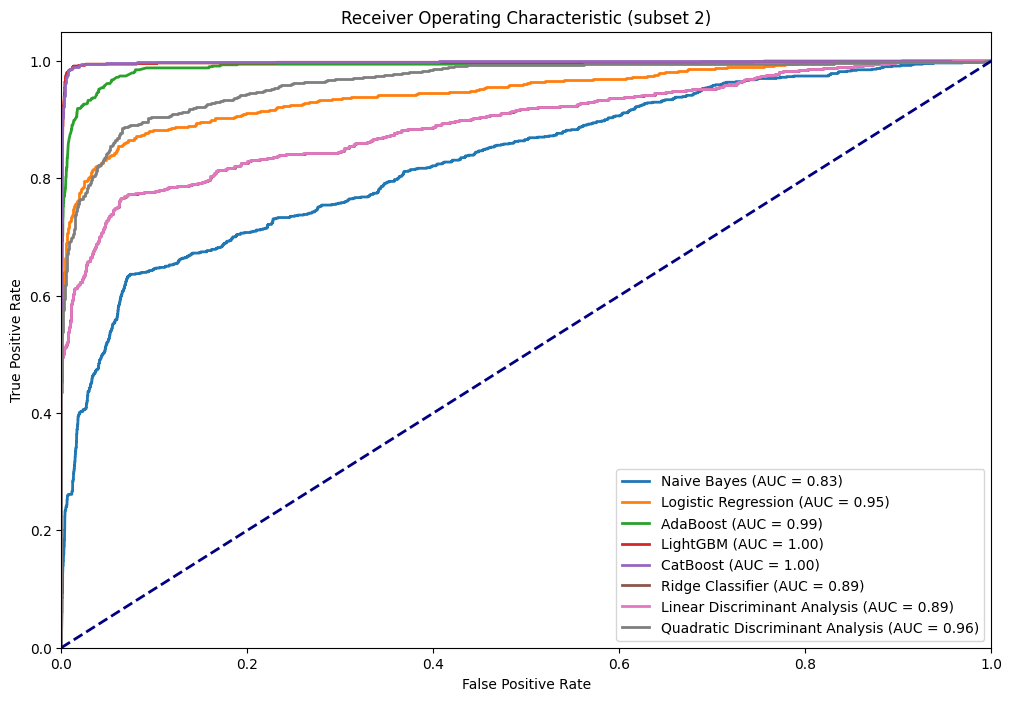

In [66]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():

    model.fit(X_train, y_train)

    if len(np.unique(y_train)) > 2:

        y_score = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    else:
        y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)

        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (subset 2)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
Best Performers:

LightGBM, CatBoost, and AdaBoost continue to be the best models.
Their consistent performance across different subsets suggests they generalize well
and should be prioritized.

Potential Overfitting:

Ridge Classifier and LDA might need further tuning or additional
regularization to prevent overfitting and improve generalization.

Naive Bayes:
Although it showed a slight improvement, Naive Bayes remains the
least effective model in this context. It might not be suitable for this task.

'''

'\nBest Performers:\n\nLightGBM, CatBoost, and AdaBoost continue to be the best models.\nTheir consistent performance across different subsets suggests they generalize well\nand should be prioritized.\n\nPotential Overfitting:\n\nRidge Classifier and LDA might need further tuning or additional\nregularization to prevent overfitting and improve generalization.\n\nNaive Bayes:\nAlthough it showed a slight improvement, Naive Bayes remains the\nleast effective model in this context. It might not be suitable for this task.\n\n'